# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
import pandas as pd
import numpy as np
!pip install palmerpenguins
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_selector, ColumnTransformer
from palmerpenguins import load_penguins
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from plotnine import *

In [2]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [3]:
ct = ColumnTransformer([("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
                                        make_column_selector(dtype_include=object))],
                                        remainder = "passthrough")

penguins_pipeline = Pipeline([
        ("preprocessing", ct)
    ])

X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins["bill_depth_mm"]

penguins_pipeline.fit(X)

trans = penguins_pipeline.named_steps["preprocessing"].transform(X)
trans_peng = pd.DataFrame(trans, columns=penguins_pipeline.named_steps["preprocessing"].get_feature_names_out())
trans_peng

,dummify__species_Adelie,dummify__species_Chinstrap,dummify__species_Gentoo,dummify__island_Biscoe,dummify__island_Dream,dummify__island_Torgersen,dummify__sex_female,dummify__sex_male,remainder__bill_length_mm,remainder__flipper_length_mm,remainder__body_mass_g,remainder__year
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,39.1,181.0,3750.0,2007.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,39.5,186.0,3800.0,2007.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,40.3,195.0,3250.0,2007.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,36.7,193.0,3450.0,2007.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,39.3,190.0,3650.0,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,55.8,207.0,4000.0,2009.0
329,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,43.5,202.0,3400.0,2009.0
330,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,49.6,193.0,3775.0,2009.0
331,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,50.8,210.0,4100.0,2009.0


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [8]:
X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# Linear Model
linear_pipeline = Pipeline([
        ("preprocessing", ct),
        ("regression", LinearRegression())
    ])

lin_fitted = linear_pipeline.fit(X_train, y_train)

linpred_train = lin_fitted.predict(X_train)
linpred_test = lin_fitted.predict(X_test)

linear_mse_train = mean_squared_error(y_train, linpred_train)
linear_mse_test = mean_squared_error(y_test, linpred_test)

In [9]:
#KNN k = 3
knn3_pipeline = Pipeline([
        ("preprocessing", ct),
        ("KNN3", KNeighborsRegressor(n_neighbors= 3))
    ])

knn3_fit = knn3_pipeline.fit(X_train, y_train)

knn3pred_train = knn3_fit.predict(X_train)
knn3pred_test = knn3_fit.predict(X_test)

knn3mse_train = mean_squared_error(y_train, knn3pred_train)
knn3mse_test = mean_squared_error(y_test, knn3pred_test)

In [11]:
#KNN k = 5
knn5_pipeline = Pipeline([
        ("preprocessing", ct),
        ("KNN5", KNeighborsRegressor(n_neighbors= 5))
    ])

knn5_fit = knn5_pipeline.fit(X_train, y_train)

knn5pred_train = knn5_fit.predict(X_train)
knn5pred_test = knn5_fit.predict(X_test)

knn5mse_train = mean_squared_error(y_train, knn5pred_train)
knn5mse_test = mean_squared_error(y_test, knn5pred_test)

In [13]:
#Decision Tree
dtree_pipeline = Pipeline([
        ("preprocessing", ct),
        ("decision_tree", DecisionTreeRegressor(random_state=1))
    ])

dtree_fitted = dtree_pipeline.fit(X_train, y_train)

dtree_pred_train = dtree_fitted.predict(X_train)
dtree_pred_test = dtree_fitted.predict(X_test)

dtree_mse_train = mean_squared_error(y_train, dtree_pred_train)
dtree_mse_test = mean_squared_error(y_test, dtree_pred_test)

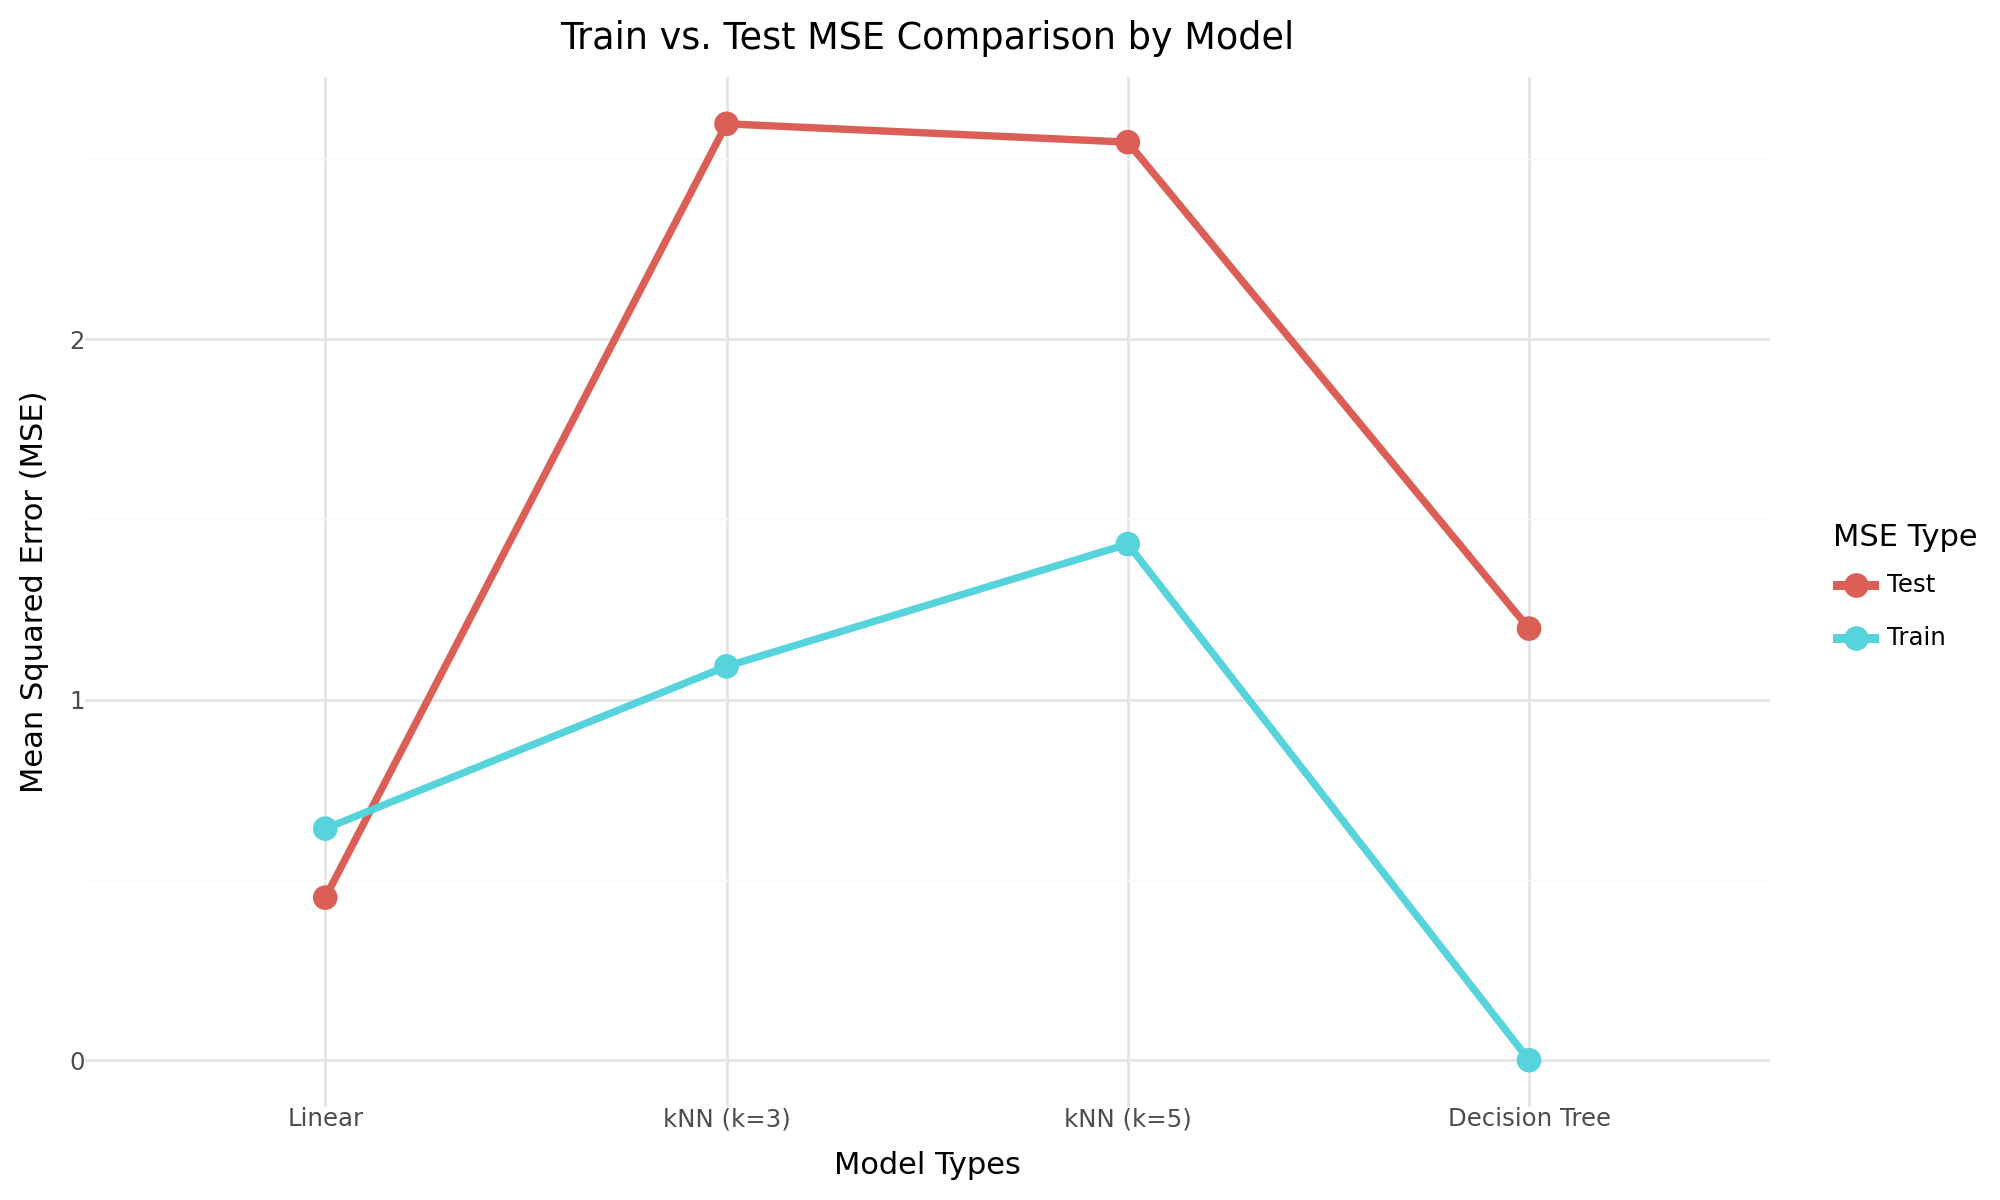

In [20]:
plot_data = pd.DataFrame({
    "Model": ["Linear", "kNN (k=3)", "kNN (k=5)", "Decision Tree"],
    "Train": [linear_mse_train, knn3mse_train, knn5mse_train, dtree_mse_train],
    "Test": [linear_mse_test, knn3mse_test, knn5mse_test, dtree_mse_test]
})
plot_data_long = plot_data.melt(id_vars="Model", value_vars=["Train", "Test"], var_name="MSE Type", value_name="MSE")

ggplot_plot = (
    ggplot(plot_data_long, aes(x="Model", y="MSE", color="MSE Type", group="MSE Type"))
    + geom_line(size=1.5, linetype="solid")
    + geom_point(size=4)
    + labs(
        title="Train vs. Test MSE Comparison by Model",
        y="Mean Squared Error (MSE)",
        x="Model Types",
        color="MSE Type"
    )
    + scale_x_discrete(limits=["Linear", "kNN (k=3)", "kNN (k=5)", "Decision Tree"])
    + theme_minimal()
    + theme(figure_size=(10, 6))
)
ggplot_plot


The linear model seems to me to be the best of our 4 models. The test mse is relatively low and close to the Train MSE, suggesting minimal overfitting and good generalization. It allso has a relatively low train mse, although not extreme like decision tree which may indicate overfitting.